<h1><strong><center>Análise Exploratória de Dados - Absenteísmo

<h3><strong>Data Frame(s):</h3></strong>
<li><em>Absenteísmo em uma empresa de logística (Brasil) 2007-2010: https://archive.ics.uci.edu/dataset/445/absenteeism+at+work </li>
<li>Dados .gov: https://www.gov.br/trabalho-e-emprego/pt-br/assuntos/estatisticas-trabalho/microdados-rais-e-caged  **</li>


Bibliotecas

In [3]:
from ucimlrepo import fetch_ucirepo #pip install ucimlrepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations



SystemError: <class 'numpy.iinfo'> returned a result with an exception set

Montando DataFrame

In [ ]:
# fetch dataset 
absenteeism_at_work = fetch_ucirepo(id=445) 
  
# data (as pandas dataframes) 
X = absenteeism_at_work.data.features 
y = absenteeism_at_work.data.targets 

# Junta os features e o target em um único DataFrame
df = pd.concat([X, y], axis=1)

# Visualiza as primeiras linhas
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [ ]:
#Estrutura básica do DF
df.info()
df.shape
df.columns
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            740 non-null    float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [ ]:
#Valores ausentes e duplicados
print("Verificação de dados nulos (soma por coluna):")
print(df.isnull().sum())

print("\nVerificação de dados duplicados (soma):")
print(df.duplicated().sum())


Verificação de dados nulos (soma por coluna):
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

Verificação de dados duplicados (soma):
34


In [ ]:
#Mostrar valores duplicados e seus pares
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(6)


#Como o objetivo da análise é descobrir o que influencia principalmente no absenteísmo, ocorrências idênticas provavelmente seriam casos legítmos e não erro de inserção de dado

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
105,22,12,4,4,361,52,3,28,261.306,97,0,1,1,1,0,4,80,172,27,8
109,22,12,4,4,361,52,3,28,261.306,97,0,1,1,1,0,4,80,172,27,8
118,23,1,5,2,184,42,7,27,308.593,95,0,1,0,0,0,0,58,167,21,2
132,23,1,5,2,184,42,7,27,308.593,95,0,1,0,0,0,0,58,167,21,2
428,23,5,4,3,179,26,9,30,246.074,99,0,3,0,0,0,0,56,171,19,3
440,23,5,4,3,179,26,9,30,246.074,99,0,3,0,0,0,0,56,171,19,3



# <center>🧾 Detalhamento das colunas do DF

Abaixo está o detalhamento das colunas do *dataset* **Absenteeism at Work**, contendo explicações e contexto adicional para a correta interpretação de cada variável.

---

### **1. Individual identification (ID)**
Identificador único de cada funcionário.  
Serve apenas para diferenciar os indivíduos, **não contém significado analítico** por si só.

---

### **2. Reason for absence (ICD)**
Código que representa o motivo da ausência, de acordo com a **Classificação Internacional de Doenças (CID)**.  
Os motivos são agrupados em **21 categorias principais (I a XXI)**, conforme as diretrizes da OMS, além de **7 categorias extras (22 a 28)** para situações não relacionadas a doenças.

#### **Categorias (CID)**
| Código | Descrição |
|:-------:|------------|
| I | Doenças infecciosas e parasitárias |
| II | Neoplasias (tumores) |
| III | Doenças do sangue e do sistema imunitário |
| IV | Doenças endócrinas, nutricionais e metabólicas |
| V | Transtornos mentais e comportamentais |
| VI | Doenças do sistema nervoso |
| VII | Doenças do olho e anexos |
| VIII | Doenças do ouvido e do processo mastoide |
| IX | Doenças do sistema circulatório |
| X | Doenças do sistema respiratório |
| XI | Doenças do sistema digestivo |
| XII | Doenças da pele e tecido subcutâneo |
| XIII | Doenças do sistema musculoesquelético e tecido conjuntivo |
| XIV | Doenças do sistema geniturinário |
| XV | Gravidez, parto e puerpério |
| XVI | Condições originadas no período perinatal |
| XVII | Malformações congênitas e anomalias cromossômicas |
| XVIII | Sintomas e achados clínicos anormais não classificados em outro local |
| XIX | Lesões, envenenamentos e outras consequências de causas externas |
| XX | Causas externas de morbidade e mortalidade |
| XXI | Fatores que influenciam o estado de saúde e contato com serviços de saúde |

#### **Categorias sem CID (22 a 28)**
| Código | Descrição |
|:-------:|------------|
| 22 | Acompanhamento de paciente |
| 23 | Consulta médica |
| 24 | Doação de sangue |
| 25 | Exame laboratorial |
| 26 | Falta não justificada |
| 27 | Sessão de fisioterapia |
| 28 | Consulta odontológica |

---

### **5. Seasons**
Estação do ano correspondente ao mês da ausência.  
Codificada como:
- **1** → Verão  
- **2** → Outono  
- **3** → Inverno  
- **4** → Primavera  

Essa informação pode ajudar a identificar **padrões sazonais de absenteísmo**, como aumento de faltas no inverno devido a doenças respiratórias.

---

### **6. Transportation expense**
Custo mensal de transporte do funcionário para ir ao trabalho (em unidades monetárias locais).  
Pode indicar **distância**, **acesso ao transporte público** ou **benefícios concedidos pela empresa**.

---

### **7. Distance from Residence to Work (kilometers)**
Distância entre a residência e o local de trabalho, medida em quilômetros.  
Pode estar relacionada ao **tempo de deslocamento** e à **probabilidade de atraso ou falta**.

---

### **8. Service time**
Tempo total de serviço do funcionário na empresa, em anos.  
Pode refletir **experiência**, **lealdade** e **estabilidade no emprego**.

---

### **10. Work load Average/day**
Média de horas produtivas/demanda da empresa no trabalho (não considera a jornada individual do funcionário).
Permite avaliar **níveis de esforço físico/mental** e possíveis impactos no absenteísmo.

---

### **11. Hit target**
Indicador de **atingimento de metas** no trabalho (binário).  
Reflete o desempenho individual — valores baixos podem estar associados a **insatisfação** ou **baixo engajamento**.

---

### **12. Disciplinary failure**
Variável binária:  
- **1** → O funcionário teve falhas disciplinares registradas.  
- **0** → Nenhuma falha registrada.  

Usada como um indicador de **comportamento e comprometimento** no ambiente de trabalho.

---

### **13. Education**
Nível de escolaridade do funcionário:
- **1** → Ensino médio  
- **2** → Graduação  
- **3** → Pós-graduação  
- **4** → Mestrado ou doutorado  

Pode influenciar o tipo de função exercida e o **nível de responsabilidade profissional**.

---

### **15. Social drinker**
Indica se o funcionário **consome bebidas alcoólicas socialmente**:  
- **1** → Sim  
- **0** → Não  

Pode ser usado para avaliar a **relação entre hábitos de consumo e ausências**.

---

### **16. Social smoker**
Indica se o funcionário **fuma socialmente**:  
- **1** → Sim  
- **0** → Não  

Assim como o consumo de álcool, pode estar associado a **questões de saúde** e **maior risco de absenteísmo**.

---

### **20. Body mass index**
Índice de Massa Corporal (**IMC**) calculado a partir do peso e altura do funcionário.  
É um indicador de **condição física e saúde geral**, podendo estar relacionado ao número de faltas médicas.

---

### **21. Absenteeism time in hours (target)**
Variável-alvo (dependente) do conjunto de dados.  
Representa o **tempo total de ausência** do funcionário em horas — é o foco principal das análises e modelagens preditivas.

---
```


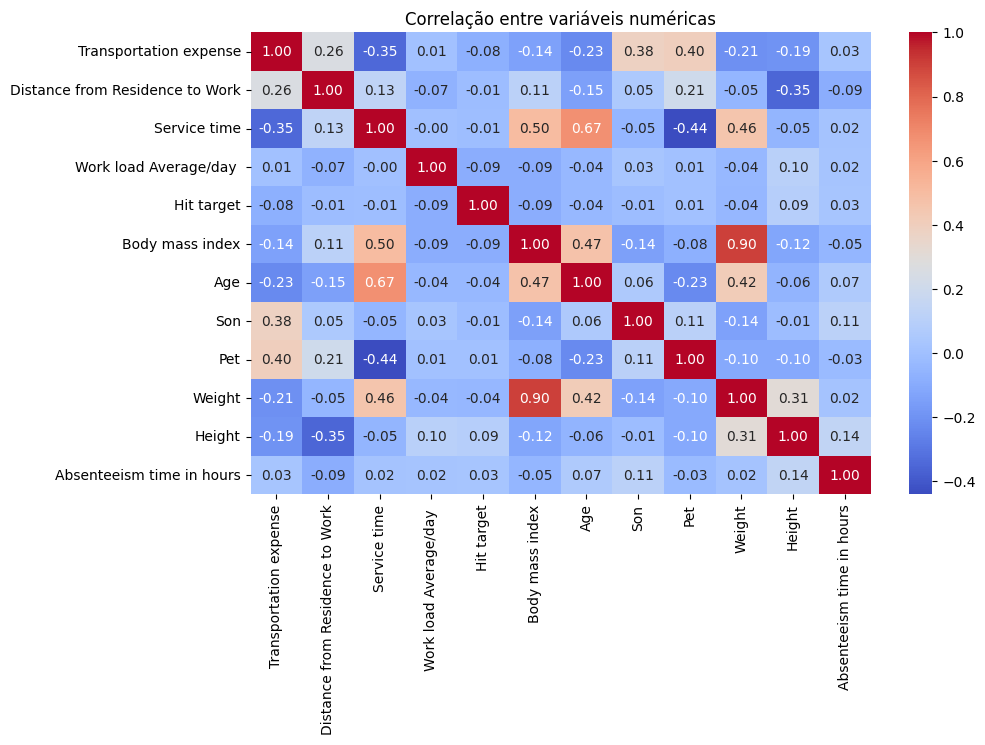

In [ ]:
#Separar variáveis em Categóricas e Numéricas

var_numericas = [
    "Transportation expense",
    "Distance from Residence to Work",
    "Service time",
    "Work load Average/day ",
    "Hit target",
    "Body mass index",
    "Age",
    "Son",
    "Pet",
    "Weight",
    "Height",
    "Absenteeism time in hours"
]


# ===== Relação entre as var_numericas =====
corr = df[[x for x in var_numericas]].corr(method="pearson")
# Visualização
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre variáveis numéricas')
plt.show()

##  Análise de Correlação entre Variáveis Numéricas — Absenteísmo no Trabalho

O banco de dados contém registros de **absenteísmo no trabalho** de julho de 2007 a julho de 2010, em uma empresa de courier no Brasil.  
O objetivo aqui é compreender **como as variáveis numéricas se relacionam entre si** e, principalmente, **como se relacionam com a variável alvo** — `Absenteeism time in hours`.

---

### Interpretação Geral do Heatmap

O mapa de calor acima representa as **correlações de Pearson** entre as variáveis numéricas.  
Os valores variam de **-1 a 1**, onde:

- **Próximo de 1:** forte correlação positiva (as variáveis aumentam juntas);
- **Próximo de -1:** forte correlação negativa (uma variável aumenta enquanto a outra diminui);
- **Próximo de 0:** correlação fraca ou inexistente.

---

### Principais Relações Observadas

#### 1. **Relações mais fortes (independente do absenteísmo)**

- **Tempo de serviço e idade:** correlação **forte (≈ 0.67)** — empregados mais velhos tendem a ter mais tempo de casa.
- **IMC e tempo de serviço:** correlação **moderada (≈ 0.50)** — pode indicar que funcionários mais antigos têm tendência a maior IMC.

Essas relações são esperadas e refletem **aspectos demográficos e físicos**, sem relação direta com o absenteísmo.

---

### Relações com o Absenteísmo (`Absenteeism time in hours`)

As correlações diretas com a variável alvo são **todas fracas** (valores próximos de 0).  
Ainda assim, vale destacar:

| Variável | Correlação com `Absenteeism time in hours` | Interpretação |
|-----------|---------------------------------------------|---------------|
| `Age` | **0.07** | Correlação positiva muito fraca — idade não parece influenciar significativamente o absenteísmo. |
| `Son` (número de filhos) | **0.11** | Leve tendência: quem tem filhos pode faltar um pouco mais, mas o efeito é pequeno. |
| `Height` | **0.14** | Correlação fraca — pode ser ruído estatístico. |
| `Transportation expense` | **0.03** | Quase nula — custos de transporte não afetam diretamente o tempo de ausência. |

Esses resultados sugerem que **as variáveis numéricas isoladas** não explicam bem o comportamento do absenteísmo.  
Provavelmente, fatores **categóricos** (como tipo de trabalho, disciplina, estado civil, motivo da ausência, estação do ano, etc.) têm influência maior.

---

### Interpretações Possíveis

1. **Baixas correlações com a target** indicam que:
   - As causas do absenteísmo não estão fortemente ligadas a atributos numéricos contínuos.
   - Pode haver **efeitos combinados** entre variáveis categóricas e numéricas (ex.: “idade + tipo de trabalho”).
   - A análise univariada pode ser insuficiente — recomenda-se testar modelos preditivos ou análise multivariada.

2. **Idade e tempo de serviço** têm relação entre si, o que pode gerar **multicolinearidade** em modelos preditivos.  
   → Um dos dois pode ser removido ou padronizado, dependendo da abordagem.

---

### Conclusão

O heatmap mostra que:
- As variáveis numéricas possuem **relações coerentes entre si**, mas
- **Pouca explicação direta** sobre o absenteísmo.  
Portanto, o comportamento de ausência no trabalho parece ser **multifatorial**, dependendo mais de **aspectos comportamentais e contextuais** do que de medidas numéricas contínuas.


In [ ]:
#Separar variáveis em Categóricas e Numéricas
var_categoricos = [
    "Reason for absence",
    "Seasons",
    "Disciplinary failure",
    "Education",
    "Social drinker",
    "Social smoker",
    "Month of absence",
    "Day of the week"
]

# --- Dicionários de mapeamento ---
reason_for_absence = {
    1: "Doenças infecciosas e parasitárias",
    2: "Neoplasias (tumores)",
    3: "Doenças do sangue e do sistema imunitário",
    4: "Doenças endócrinas, nutricionais e metabólicas",
    5: "Transtornos mentais e comportamentais",
    6: "Doenças do sistema nervoso",
    7: "Doenças do olho e anexos",
    8: "Doenças do ouvido e do processo mastoide",
    9: "Doenças do sistema circulatório",
    10: "Doenças do sistema respiratório",
    11: "Doenças do sistema digestivo",
    12: "Doenças da pele e tecido subcutâneo",
    13: "Doenças do sistema musculoesquelético e tecido conjuntivo",
    14: "Doenças do sistema geniturinário",
    15: "Gravidez, parto e puerpério",
    16: "Condições originadas no período perinatal",
    17: "Malformações congênitas e anomalias cromossômicas",
    18: "Sintomas e achados clínicos anormais não classificados em outro local",
    19: "Lesões, envenenamentos e outras consequências de causas externas",
    20: "Causas externas de morbidade e mortalidade",
    21: "Fatores que influenciam o estado de saúde e contato com serviços de saúde",
    22: "Acompanhamento de paciente",
    23: "Consulta médica",
    24: "Doação de sangue",
    25: "Exame laboratorial",
    26: "Falta não justificada",
    27: "Sessão de fisioterapia",
    28: "Consulta odontológica"
}

seasons = {1: "Verão", 2: "Outono", 3: "Inverno", 4: "Primavera"}
disciplinary_failure = {1: "Sim", 0: "Não"}
education = {1: "Ensino médio", 2: "Graduado", 3: "Pós-graduado", 4: "Mestre e doutor"}
social_drinker = {1: "Sim", 0: "Não"}
social_smoker = {1: "Sim", 0: "Não"}
month_of_absence = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril", 5: "Maio", 6: "Junho",
    7: "Julho", 8: "Agosto", 9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}
day_week = {
    2: "Segunda-feira", 3: "Terça-feira", 4: "Quarta-feira",
    5: "Quinta-feira", 6: "Sexta-feira", 7: "Sábado", 1: "Domingo"
}

# --- Criação do novo DataFrame com valores categóricos substituídos ---
df_cat = df.copy()

df_cat["Reason for absence"] = df_cat["Reason for absence"].map(reason_for_absence)
df_cat["Seasons"] = df_cat["Seasons"].map(seasons)
df_cat["Disciplinary failure"] = df_cat["Disciplinary failure"].map(disciplinary_failure)
df_cat["Education"] = df_cat["Education"].map(education)
df_cat["Social drinker"] = df_cat["Social drinker"].map(social_drinker)
df_cat["Social smoker"] = df_cat["Social smoker"].map(social_smoker)
df_cat["Month of absence"] = df_cat["Month of absence"].map(month_of_absence)
df_cat["Day of the week"] = df_cat["Day of the week"].map(day_week)

df_cat.head()

# === Estudo das correlações das variáveis categóricas entre si

#medir a força de associação entre duas variáveis categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


#loop para uso da função
# --- Calcular Cramér’s V entre todas as combinações ---
resultados = []

for var1, var2 in combinations(var_categoricos, 2):
    valor = cramers_v(df_cat[var1], df_cat[var2])
    resultados.append({"Variável 1": var1, "Variável 2": var2, "Cramers V": valor})


# --- Criar DataFrame de correlações categóricas ---
df_cramers = pd.DataFrame(resultados).sort_values(by="Cramers V", ascending=False).reset_index(drop=True)

# --- Exibir o resultado ---
print("Correlação entre variáveis categóricas (Cramér’s V):")
display(df_cramers)

Correlação entre variáveis categóricas (Cramér’s V):


C:\Users\hallisonamorim-ieg\AppData\Local\Temp\ipykernel_34388\1820650277.py:85: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


,Variável 1,Variável 2,Cramers V
0,Seasons,Month of absence,0.898249
1,Education,Social drinker,0.468037
2,Education,Social smoker,0.359025
3,Reason for absence,Social smoker,0.310898
4,Reason for absence,Social drinker,0.293985
5,Reason for absence,Seasons,0.283743
6,Reason for absence,Education,0.224646
7,Disciplinary failure,Month of absence,0.198990
8,Reason for absence,Month of absence,0.171550
9,Seasons,Disciplinary failure,0.164421


# Análise de Associação entre Variáveis Categóricas - Absenteísmo no Trabalho
---

## Introdução

As variáveis categóricas analisadas incluem:

- **Seasons**: Estação do ano.
- **Education**: Nível educacional do funcionário.
- **Reason for absence**: Motivo da ausência.
- **Disciplinary failure**: Falha disciplinar (sim/não).
- **Social drinker**: Consumo social de álcool (sim/não).
- **Social smoker**: Fumante social (sim/não).
- **Month of absence**: Mês da ausência.
- **Day of the week**: Dia da semana.

O **Cramér's V** foi calculado para identificar o grau de associação entre cada par de variáveis categóricas.

---

## Interpretação dos Valores de Cramér's V

- **Valores próximos de 0** → associação fraca ou inexistente.
- **Valores próximos de 1** → associação forte.
- Exemplos:
  - `Seasons` vs `Month of absence` = **0.898** → forte associação, esperado pois o mês define a estação.
  - `Education` vs `Social drinker` = **0.468** → associação moderada, possivelmente indicando tendência de consumo social por nível educacional.
  - `Reason for absence` vs `Social smoker` = **0.311** → associação moderada, sugerindo que alguns motivos de ausência podem estar relacionados a fumantes sociais.

---

## Observações sobre Absenteísmo

- Variáveis como `Month of absence` e `Seasons` estão fortemente associadas, mostrando padrões sazonais de absenteísmo.
- Fatores comportamentais (`Social drinker`, `Social smoker`) têm associações moderadas com `Education` e `Reason for absence`.
- `Day of the week` mostra associações muito fracas com todas as variáveis, indicando que o dia da semana não é um fator relevante para o absenteísmo.

---

## Possíveis Interpretações

1. **Sazonalidade**: O absenteísmo pode variar conforme a estação do ano, provavelmente relacionado a clima, férias ou epidemias sazonais.
2. **Comportamento e estilo de vida**: Funcionários que fumam ou bebem socialmente podem ter padrões de ausência ligeiramente diferentes.
3. **Educação e motivos de ausência**: A educação pode influenciar certos comportamentos no trabalho e tipos de ausências.


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: absenteísmo vs motivo de ausência
sns.boxplot(x='Reason for absence', y='Absenteeism time in hours', data=df)
plt.title('Absenteísmo por motivo')
plt.xticks(rotation=45)
plt.show()

SystemError: <class 'numpy.iinfo'> returned a result with an exception set